# Setting up
#### Importing libraries for the entire file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#### Declaring functions for the entire file

In [5]:
def linear(x, a, b=0):
    """
    Returns the image of x under the linear function with parametres a and b.

    Parameters 
    ----------
    x : float or ndarray
        Input data

    a : float
        First parameter of the function (slope)

    b : float
        Second parameter of the function (y-intercept)
        

    Returns
    -------
    y : float or ndarray
        Value or ndarray of the values of a*x+b
    """
    
    return a*x+b

def chisquare(y, ymod, s) :
    """
    Returns the ndarray resulting of the computation of the chi-square's for the given data

    Parameters
    ----------
    y : float or ndarray
        Input acting like the set of the mesured y data

    ymod : float or ndarray
        Input acting like the data generated with the computed fitting parameters

    s : float
        Scale of the normal law governing the noise of either x or y


    Returns
    -------
    res : float
        Resulting chis-square value
    """
    
    return (y - ymod)**2/s**2

def sumChisquaresNoiseOnX(ytrue, paramMod, x, s) :
    """
    Returns the sum of the computed chi-square's assuming a noise on x only

    Parameters
    ----------
    ytrue : float or ndarray
        Input acting like the set of the mesured y data assumed to be without noise

    paramMod : À COMPLÉTER ---------------------------------------------------

    x : Input data acting like the set of x data assumed to carry noise

    s : float
        Scale of the normal law governing the noise of the mesured x data

    Returns
    -------
    res : float
        Sum of the chi-square's for the given data
    """
    
    ymod = model(x, paramMod[0], paramMod[1])
    return np.sum(chisquare(ytrue, ymod, s))

def sumChisquaresNoiseOnY(y, paramMod, xtrue, s) :
    """
    Returns the sum of the computed chi-square's for the given data assuming a noise on y data only

    Parameters
    ----------
    y : float or ndarray
        Input acting like the set of the mesured y data assumed to carry noise

    paramMod : À COMPLÉTER --------------------------------------------------

    xtrue : float or ndarray
        Input data acting like the x data assumed to be without noise

    s : float
        Scale of the normal law governing the noise of the mesured y data

    Returns
    -------
    res : float
        Sum of the chi-square's for the given data
    """
    
    ymod = model(xtrue, paramMod[0], paramMod[1])
    return np.sum(chisquare(y, ymod, s))

#### Declaring variables for the entire file

In [6]:
# Taking a linear function as our model 
model = linear

# Numerical values arbitrarily chosen
a = 9
b = 43
xtrue = np.arange(0, 1, 0.001)
ytrue = model(xtrue, a, b)
n = len(xtrue)
s = 0.2
xe = np.random.normal(loc=0, size=n, scale=s)
ye = np.random.normal(loc=0, size=n, scale=s)
x = xtrue + xe
y = ytrue + ye

# Starting to fit
#### Mean absolute deviation of computed fitting parameters with respect to scale for every combination of parameters' signs

In [ ]:
# Declaring useful variables (numerical values arbitrarily chosen)
absA = a
absB = b
scales = np.random.uniform(size=50, high=5)

# Declaring variables useful for the plot
symbols = ("-", "+")
alpha = (1, 0.25)
alphaIndex = 0
fig, axs = plt.subplots(2, 2)
fig.suptitle("Mean absolute deviation of computed fitting parameters with respect to scale for every combination of parameters' signs (arbitrary absolute value)")
index = 0

# Computing the mean absolute deviation with respect to scale for every combination of parametres' signs
for locA, locB in [(absA,absB), (absA, -absB), (-absA, absB), (-absA, -absB)] :
    y = model(x, locA, locB)
    aBiais = []
    bBiais = []

    # Comuting the mean absolute deviation for each scale value
    for s in scales:
        aVals = []
        bVals = []

        # Fitting 1000 times for 
        for i in range(0,1000) :
            xe = np.random.normal(loc=0, size=n, scale=s)
            ye = np.random.normal(loc=0, size=n, scale=s)
            xnoise = x + xe
            ynoise = y + ye
            popt, pcov = opt.curve_fit(model, xnoise, ynoise)
            perr = np.sqrt(np.diag(pcov))
            aVals.append(popt[0] - locA)
            bVals.append(popt[1] - locB)
        aBiais.append(np.mean(aVals))
        bBiais.append(np.mean(bVals))
    ax = axs[index//2, index%2]
    ax.scatter(scales,aBiais, color="red", alpha=alpha[alphaIndex], marker=f"${symbols[a>=0]}$")
    ax.scatter(scales,bBiais, color="blue", alpha=alpha[alphaIndex], marker=f"${symbols[b>=0]}$")
    ax.set(xlabel="erreur (σ)", ylabel="écart moyen")
    ax.label_outer()
    index += 1

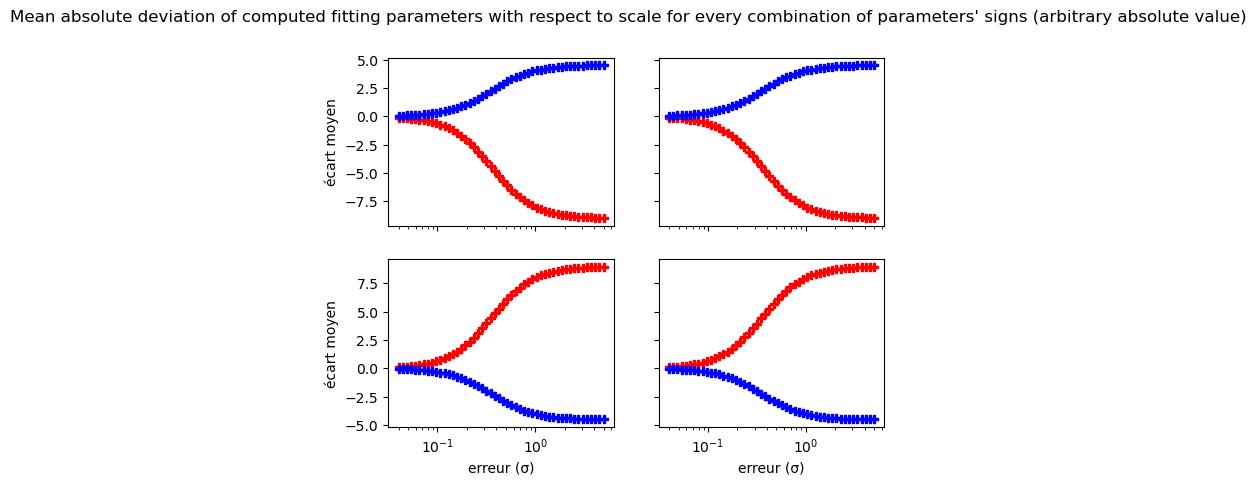

In [7]:
# Declaring useful variables (numerical values arbitrarily chosen)
absA = a
absB = b
scales = np.logspace(-2, 1, base=5)

# Declaring variables useful for the plot
symbols = ("-", "+")
alpha = (1, 0.25)
alphaIndex = 0
fig, axs = plt.subplots(2, 2)
fig.suptitle("Mean absolute deviation of computed fitting parameters with respect to scale for every combination of parameters' signs (arbitrary absolute value)")
index = 0

# Computing the mean absolute deviation with respect to scale for every combination of parametres' signs
for locA, locB in [(absA,absB), (absA, -absB), (-absA, absB), (-absA, -absB)] :
    y = model(x, locA, locB)
    aBiais = []
    bBiais = []

    # Comuting the mean absolute deviation for each scale value
    for s in scales:
        aVals = []
        bVals = []

        # Fitting 1000 times for 
        for i in range(0,1000) :
            xe = np.random.normal(loc=0, size=n, scale=s)
            ye = np.random.normal(loc=0, size=n, scale=s)
            xnoise = x + xe
            ynoise = y + ye
            popt, pcov = opt.curve_fit(model, xnoise, ynoise)
            perr = np.sqrt(np.diag(pcov))
            aVals.append(popt[0] - locA)
            bVals.append(popt[1] - locB)
        aBiais.append(np.mean(aVals))
        bBiais.append(np.mean(bVals))
    ax = axs[index//2, index%2]
    ax.scatter(scales,aBiais, color="red", alpha=alpha[alphaIndex], marker=f"${symbols[locA>=0]}$")
    ax.scatter(scales,bBiais, color="blue", alpha=alpha[alphaIndex], marker=f"${symbols[locB>=0]}$")
    ax.set(xlabel="erreur (σ)", ylabel="écart moyen")
    ax.label_outer()
    ax.set_xscale("log")
    index += 1

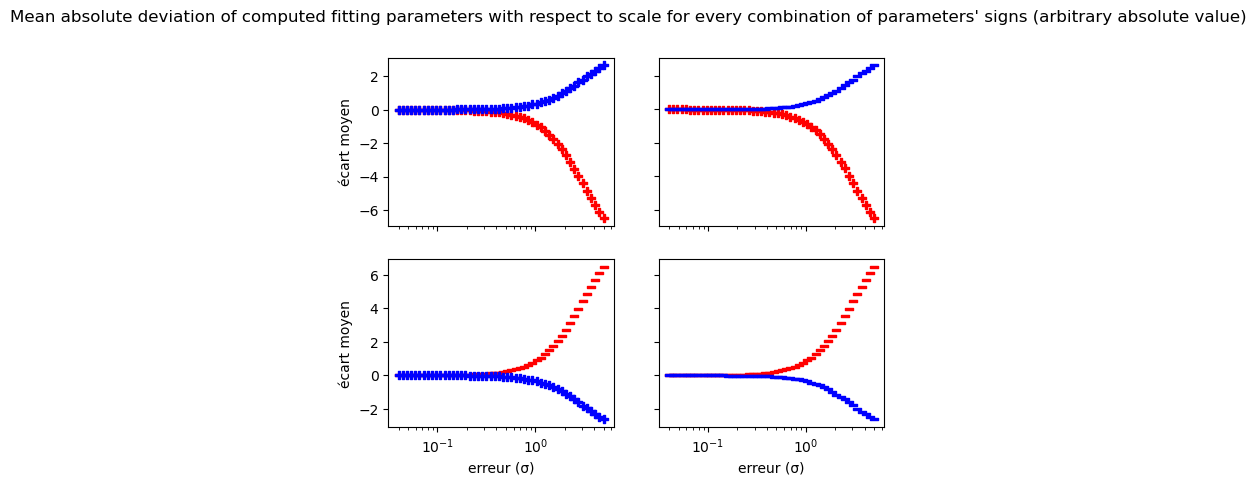

In [9]:
# Declaring useful variables (numerical values arbitrarily chosen)
absA = a
absB = b
scales = np.logspace(-2, 1, base=5)

# Declaring variables useful for the plot
symbols = ("-", "+")
fig, axs = plt.subplots(2, 2)
fig.suptitle("Mean absolute deviation of computed fitting parameters with respect to scale for every combination of parameters' signs (arbitrary absolute value)")
index = 0

# Computing the mean absolute deviation with respect to scale for every combination of parametres' signs
for locA, locB in [(absA,absB), (absA, -absB), (-absA, absB), (-absA, -absB)] :
    y = model(x, locA, locB)
    aBiais = []
    bBiais = []

    # Comuting the mean absolute deviation for each scale value
    for s in scales:
        aVals = []
        bVals = []

        # Fitting 1000 times for 
        for i in range(0,1000) :
            xe = np.random.normal(loc=0, size=n, scale=s)
            ye = np.random.normal(loc=0, size=n, scale=s)
            xnoise = x + xe
            ynoise = y + ye
            popt, pcov = opt.curve_fit(model, xnoise, ynoise)
            perr = np.sqrt(np.diag(pcov))
            aVals.append(popt[0] - locA)
            bVals.append(popt[1] - locB)
        aBiais.append(np.mean(aVals))
        bBiais.append(np.mean(bVals))
    ax = axs[index//2, index%2]
    ax.scatter(scales,aBiais, color="red", alpha=alpha[alphaIndex], marker=f"${symbols[locA>=0]}$")
    ax.scatter(scales,bBiais, color="blue", alpha=alpha[alphaIndex], marker=f"${symbols[locB>=0]}$")
    ax.set(xlabel="erreur (σ)", ylabel="écart moyen")
    ax.label_outer()
    ax.set_xscale("log")
    index += 1

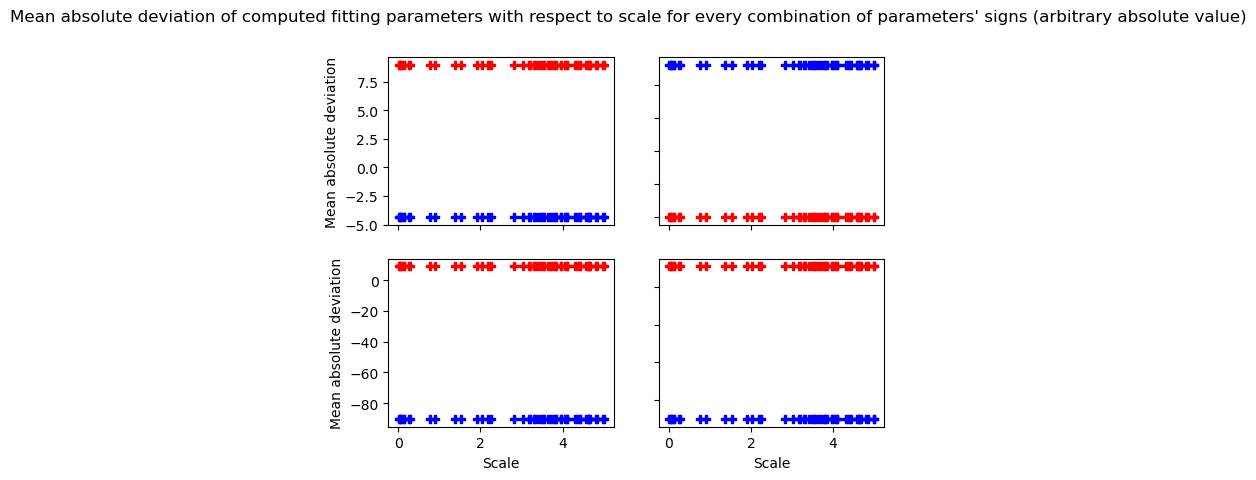

In [8]:
# Declaring useful variables (numerical values arbitrarily chosen)
absA = a
absB = b
scales = np.random.uniform(size=50, high=5)

# Declaring variables useful for the plot
symbols = ("-", "+")
fig, axs = plt.subplots(2, 2)
fig.suptitle("Mean absolute deviation of computed fitting parameters with respect to scale for every combination of parameters' signs (arbitrary absolute value)")
index = 0

# Looping for each combination of parameters's signs
for locA, locB in [(-absA,-absB), (absA, -absB), (-absA, absB), (absA, absB)] :
    ytrue = model(xtrue, locA, locB)
    admeansA = []
    admeansB = []

    # Looping for each scale value
    for s in scales:
        locadsA = []
        locadsB = []

        # Fitting 1000 times with for each time newly generated random errors
        for i in range(0,1000) :
            xe = np.random.normal(loc=0, size=n, scale=s)
            ye = np.random.normal(loc=0, size=n, scale=s)
            x = xtrue + xe
            y = ytrue + ye
            popt, pcov = opt.curve_fit(model, xnoise, ynoise)
            #perr = np.sqrt(np.diag(pcov))
            locadsA.append(popt[0] - locA)
            locadsB.append(popt[1] - locB)
        admeansA.append(np.mean(locadsA))
        admeansB.append(np.mean(locadsB))

    # Setting up the corresponding axes
    ax = axs[index//2, index%2]
    ax.scatter(scales,admeansA, color="red", marker=f"${symbols[locA>=0]}$")
    ax.scatter(scales,admeansB, color="blue", marker=f"${symbols[locB>=0]}$")
    ax.set(xlabel="Scale", ylabel="Mean absolute deviation")
    ax.label_outer()
    index += 1

# Displaying the plot
plt.show()

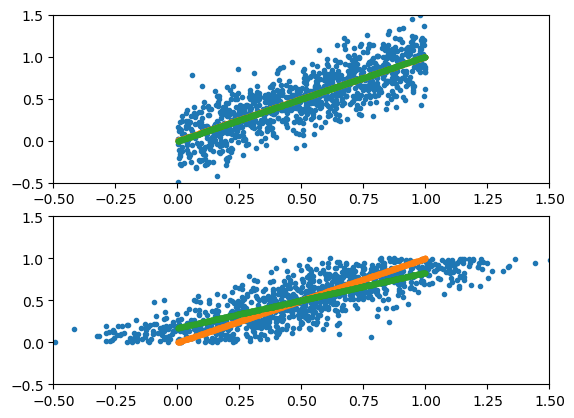

In [37]:
def func(x, a, b) :
    return a*x+b

def func(x, a, b) :
    return a*x+b
n = 999
x = np.random.uniform(size=n)
e = np.random.normal(loc=0, size=n, scale=0.2)
y = func(x, 1, 0)
xnoise = x + e
ynoise = y + e
fig, (ax1, ax2) = plt.subplots(2)
min = -0.5
max = 1.5
ax1.set_xlim([min, max])
ax1.set_ylim([min, max])
ax2.set_xlim([min, max])
ax2.set_ylim([min, max])
ax1.scatter(x, ynoise, marker=".")
ax2.scatter(xnoise, y, marker=".")
popt, pcov, infodict, mesg, ier = opt.curve_fit(func, x, ynoise, full_output=True)
ymod = popt[0]*x+popt[1]
ax1.scatter(x, y, marker=".")
ax1.scatter(x, ymod, marker=".")
popt, pcov, infodict, mesg, ier = opt.curve_fit(func, xnoise, y, full_output=True)
ymod = popt[0]*x+popt[1]
ax2.scatter(x, y, marker=".")
ax2.scatter(x, ymod, marker=".")

[0.99852778 0.01267348]
[ 1.00002341 -0.01507926]


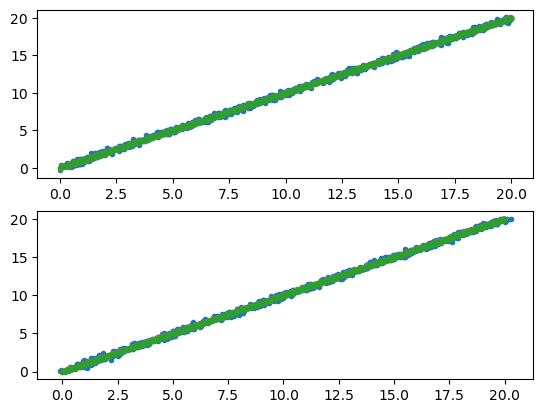

In [43]:
def func(x, a, b) :
    return a*x+b
    
def khi2(y, ymod) :
    return (y - ymod)**2/s**2

def sumTermsNoiseX(paramMod) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b), paramMod[0]*(x+xerr[i])+paramMod[1])
        i += 1
    return res

def sumTermsNoiseY(paramMod) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b)+yerr[i], paramMod[0]*x+paramMod[1])
        i += 1
    return res
    
n = 999
a = 1
b = 0
s = 0.2

xs = np.random.uniform(size=n, high=20)
xerr = np.random.normal(0, scale=s, size=n)
xnoise = xs + xerr
ys = func(xs, a, b)
yerr = np.random.normal(0, scale=s, size=n)
ynoise = ys + yerr

fig, (ax1, ax2) = plt.subplots(2)
min = -0.5
max = 1.5
#ax1.set_xlim([min, max])
#ax1.set_ylim([min, max])
#ax2.set_xlim([min, max])
#ax2.set_ylim([min, max])

ax1.scatter(xs, ynoise, marker=".")
ax2.scatter(xnoise, ys, marker=".")

popt = opt.minimize(sumTermsNoiseY, [2525, 25]).x
print(popt)
ymod = popt[0]*xs+popt[1]
ax1.scatter(xs, ys, marker=".")
ax1.scatter(xs, ymod, marker=".")

popt = opt.minimize(sumTermsNoiseX, [2425, 52]).x
print(popt)
ymod = popt[0]*xs+popt[1]
ax2.scatter(xs, ys, marker=".")
ax2.scatter(xs, ymod, marker=".")